# Tutorial 6 (a)
## ARIMA Model

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [4]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [5]:
# Load the data set, The Dow Jones Industrial Average is a widely-watched benchmark index in the U.S. for blue-chip stocks.
djia_df = pd.read_csv("RADL3.SA.csv")

# Display the records
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,21.511538,22.115383,21.432692,22.082691,21.268667,5453760
1,2020-01-03,21.730768,21.851923,21.523075,21.590384,20.794510,7860320
2,2020-01-06,21.423077,21.423077,21.042307,21.165384,20.385176,5387200
3,2020-01-07,21.165384,21.169230,20.673077,20.875000,20.105499,4614480
4,2020-01-08,20.978846,21.190384,20.678846,21.153847,20.374060,2984800
5,2020-01-09,21.201923,21.790384,21.117308,21.790384,20.987133,5871320
6,2020-01-10,21.703846,21.834616,20.980768,21.115383,20.337015,4393480
7,2020-01-13,21.113461,21.609615,21.082691,21.609615,20.813028,3290560
8,2020-01-14,21.525000,21.932692,21.244230,21.932692,21.124195,5039840
9,2020-01-15,21.903847,22.000000,21.711538,21.998075,21.187168,4990440


In [6]:
# Store the 'Date' column into dataframe 'djia_df'
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')

# Attach your own 'Data' index to the dataframe
djia_df.index = djia_df['Date']

# Drop the 'Date' column from the dataframe
djia_df.drop('Date', axis = 1, inplace = True)

AssertionError: 

In [7]:
# Display first 10 records
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,21.511538,22.115383,21.432692,22.082691,21.268667,5453760
1,2020-01-03,21.730768,21.851923,21.523075,21.590384,20.794510,7860320
2,2020-01-06,21.423077,21.423077,21.042307,21.165384,20.385176,5387200
3,2020-01-07,21.165384,21.169230,20.673077,20.875000,20.105499,4614480
4,2020-01-08,20.978846,21.190384,20.678846,21.153847,20.374060,2984800
5,2020-01-09,21.201923,21.790384,21.117308,21.790384,20.987133,5871320
6,2020-01-10,21.703846,21.834616,20.980768,21.115383,20.337015,4393480
7,2020-01-13,21.113461,21.609615,21.082691,21.609615,20.813028,3290560
8,2020-01-14,21.525000,21.932692,21.244230,21.932692,21.124195,5039840
9,2020-01-15,21.903847,22.000000,21.711538,21.998075,21.187168,4990440


In [8]:
# Drop null values from the dataframe
djia_df = djia_df.dropna()

# Display the sumof null values
djia_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Display the information of the dataframe
djia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       993 non-null    object 
 1   Open       993 non-null    float64
 2   High       993 non-null    float64
 3   Low        993 non-null    float64
 4   Close      993 non-null    float64
 5   Adj Close  993 non-null    float64
 6   Volume     993 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.4+ KB


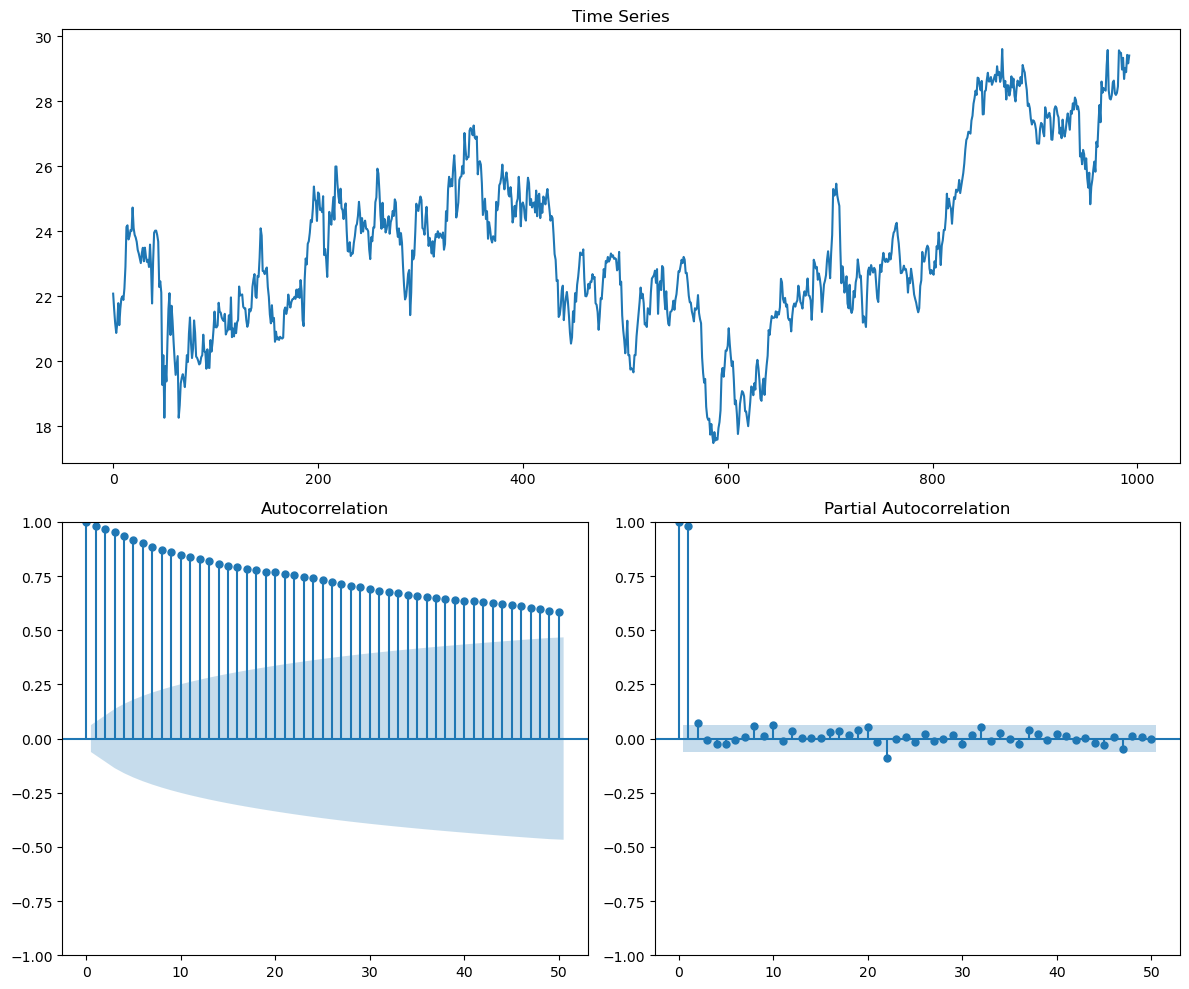

In [10]:
# Display plot of close column and Date index
plotds(djia_df['Close'], nlag = 100)

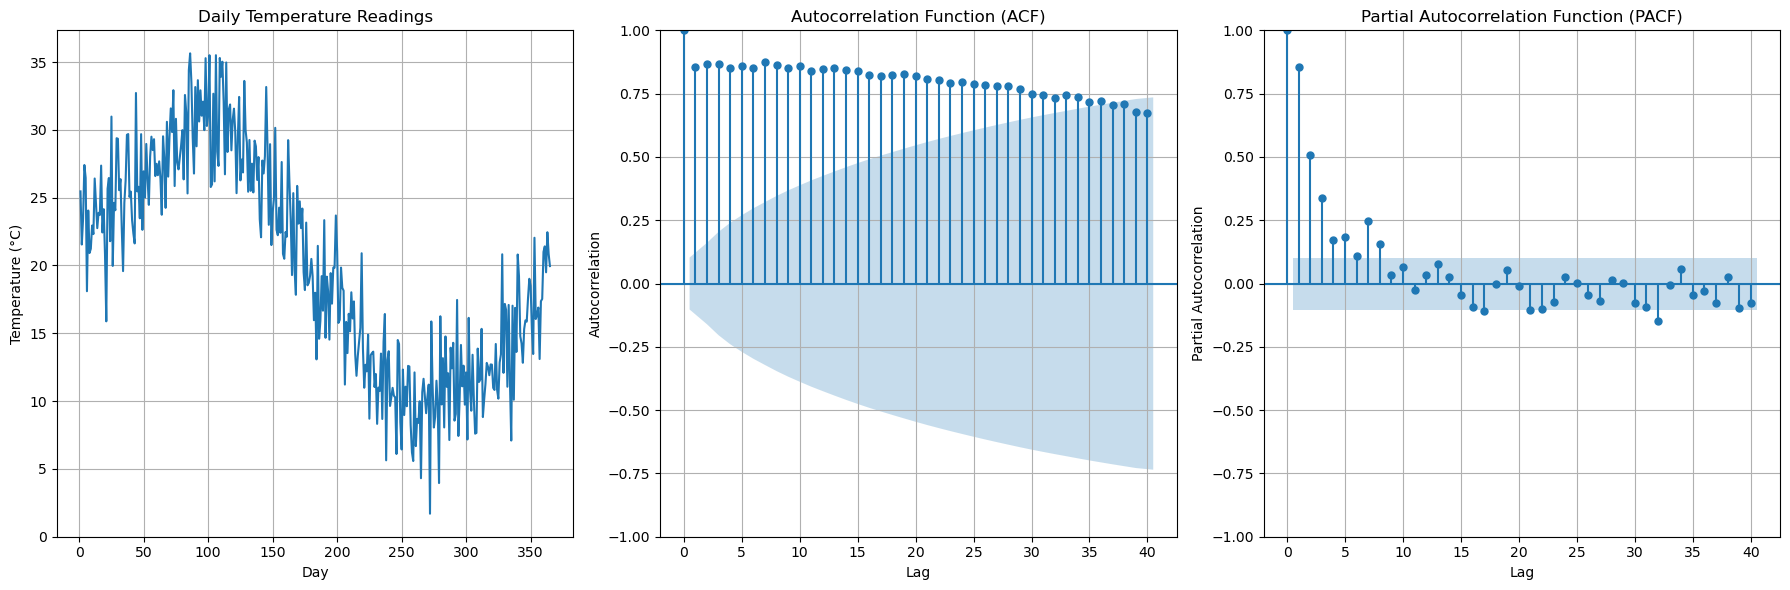

In [11]:
# Example to show the difference between ACF and PAF
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# We generate a synthetic dataset representing daily temperature readings over a year.
np.random.seed(0)
days = np.arange(1, 366)
temperature = 20 + np.sin(2 * np.pi * days / 365) * 10 + np.random.normal(0, 3, 365)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# We plot the temperature data to visualize the underlying pattern.
axs[0].plot(days, temperature)
axs[0].set_title('Daily Temperature Readings')
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Temperature (°C)')
axs[0].grid(True)

# The ACF plot shows the correlation between the temperature values at different lags. For example, we might observe 
# high autocorrelation at lag 1 (temperature today vs. temperature yesterday), indicating that consecutive days are correlated.
plot_acf(temperature, lags=40, ax=axs[1])
axs[1].set_title('Autocorrelation Function (ACF)')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation')
axs[1].grid(True)

# The PACF plot, on the other hand, shows the partial autocorrelation, which represents the correlation between two time points 
# after removing the effects of the intervening observations. It helps identify the direct relationships between observations 
# at different lags.
plot_pacf(temperature, lags=40, ax=axs[2])
axs[2].set_title('Partial Autocorrelation Function (PACF)')
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('Partial Autocorrelation')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [12]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 21.480030, mean2 = 23.748342
variance1 = 2.230349, variance2 = 6.916141


In [13]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result = adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -2.095733
p-value: 0.246234


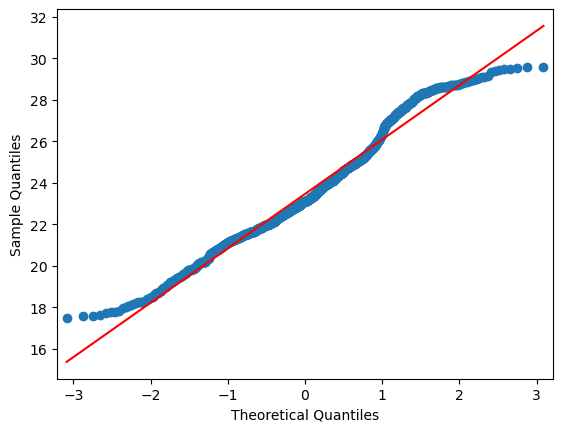

In [14]:
# qqplot for the 'Close' column
x = sm.qqplot(djia_df['Close'], line = 's')

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(djia_df['Close'], order = (1, 1, 0))

#the first 1 means autoregression
# the second 1 means first order difference

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

In [16]:
# Store one difference value of the 'Close' column
first_order_diff = djia_df['Close'].diff(1)

# Display the first five records
first_order_diff.head()

0         NaN
1   -0.492307
2   -0.425000
3   -0.290384
4    0.278847
Name: Close, dtype: float64

In [17]:
# Store one difference value of the 'Close' column
first_order_diff = djia_df['Close'].diff(2)

# Display the first five records
first_order_diff.head()

0         NaN
1         NaN
2   -0.917307
3   -0.715384
4   -0.011537
Name: Close, dtype: float64

In [18]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = djia_df['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

1   -0.492307
2   -0.425000
3   -0.290384
4    0.278847
5    0.636537
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

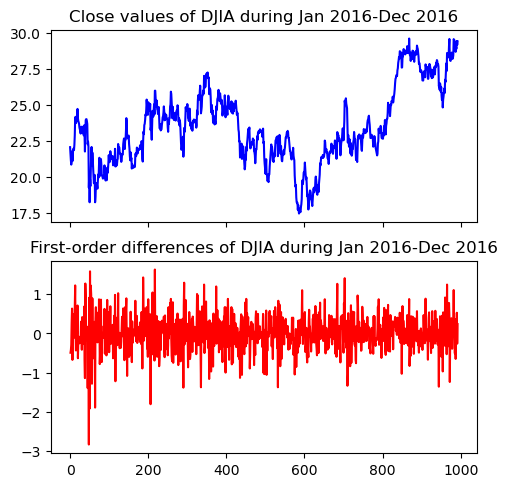

In [19]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

ADF Statistic: -34.518613
p-value: 0.000000


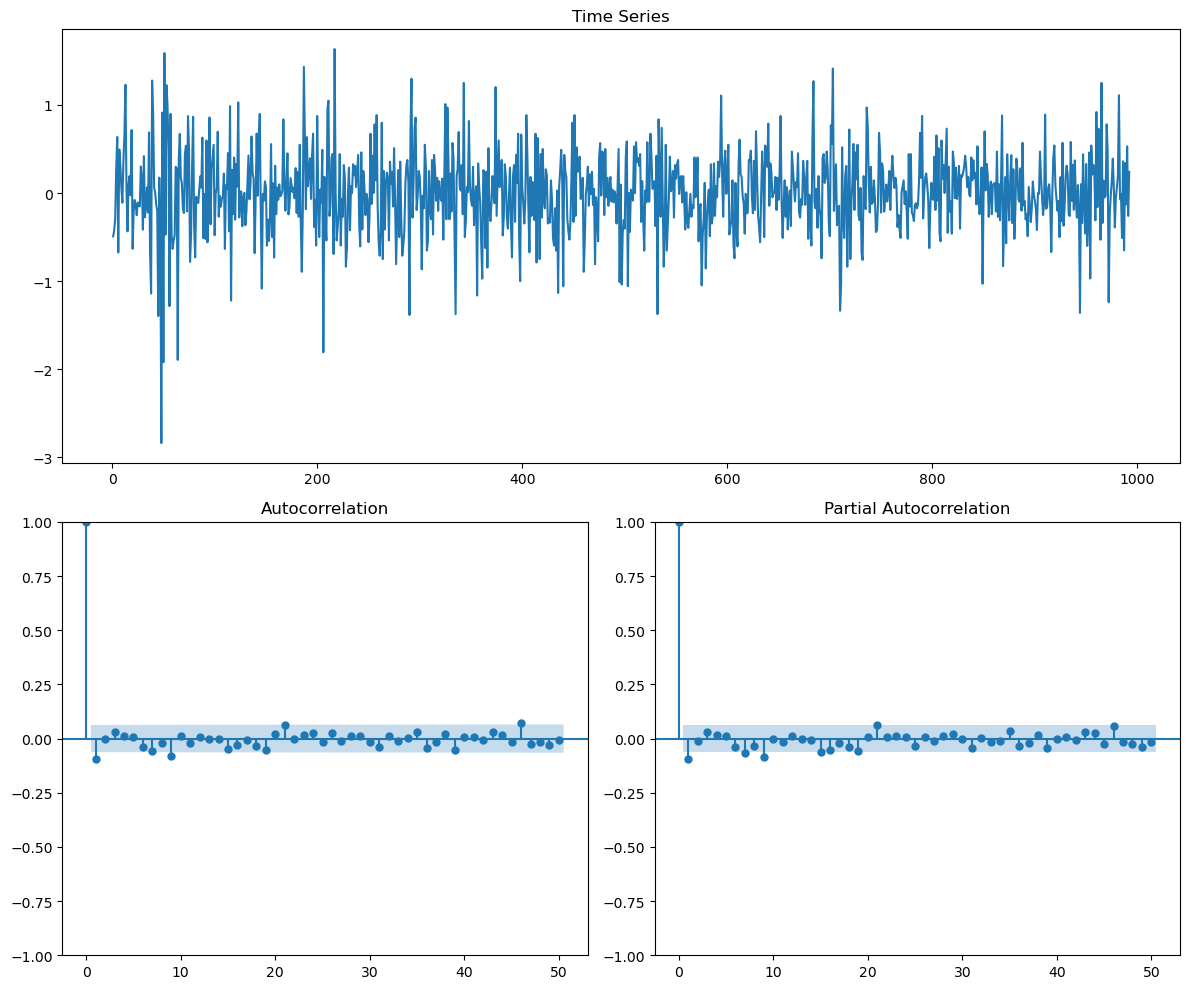

In [20]:
# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [21]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(djia_df['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 1291.5233193708652], [0, 1, 1, 1284.9926354678437], [0, 1, 2, 1286.9838036068968], [1, 1, 0, 1285.066747255763], [1, 1, 1, 1286.987427822984], [1, 1, 2, 1288.7449659495026], [2, 1, 0, 1286.9344131096984], [2, 1, 1, 1288.672094654617], [2, 1, 2, 1280.2932184413871], [0, 2, 0, 2064.815708676295], [0, 2, 1, 1299.8718955138177], [0, 2, 2, 1293.484243189846], [1, 2, 0, 1723.9766517414114], [1, 2, 1, 1293.5465901260109], [1, 2, 2, 1296.9154463545415], [2, 2, 0, 1573.8720833445072], [2, 2, 1, 1295.4289013485145], [2, 2, 2, 1292.7105655116843]]


In [22]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(djia_df['Close'].tolist(), order = (0, 2, 1))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  993
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -647.936
Date:                Sun, 21 Apr 2024   AIC                           1299.872
Time:                        18:01:45   BIC                           1309.669
Sample:                             0   HQIC                          1303.597
                                - 993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      0.281     -3.558      0.000      -1.551      -0.449
sigma2         0.2150      0.060      3.556      0.000       0.097       0.333
===================================================================================
Ljung-Box (L1) (Q):                   8.35   Jarque-Bera (JB):               248.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* AIC: Akaikes Information Criterion: Estimator of the relative quality of statistical models for a given set of data. The AIC deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.
* BIC: Bayesian Information Criterion: Similar to the AIC, but with a larger penalty term for the number of parameters in the model.
* Hannan–Quinn information criterion (HQC) is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

In [23]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
djia_df['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
djia_df['diffval'] = diffval

# Display first five records
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
0,2020-01-02,21.511538,22.115383,21.432692,22.082691,21.268667,5453760,0.000000,22.082691
1,2020-01-03,21.730768,21.851923,21.523075,21.590384,20.794510,7860320,33.124037,21.590384
2,2020-01-06,21.423077,21.423077,21.042307,21.165384,20.385176,5387200,21.098082,21.165384
3,2020-01-07,21.165384,21.169230,20.673077,20.875000,20.105499,4614480,20.706733,20.875000
4,2020-01-08,20.978846,21.190384,20.678846,21.153847,20.374060,2984800,20.472438,21.153847


It is clear from the above results that the first two rows have zero values as shown for 2016-01-04 and 2016-01-05.

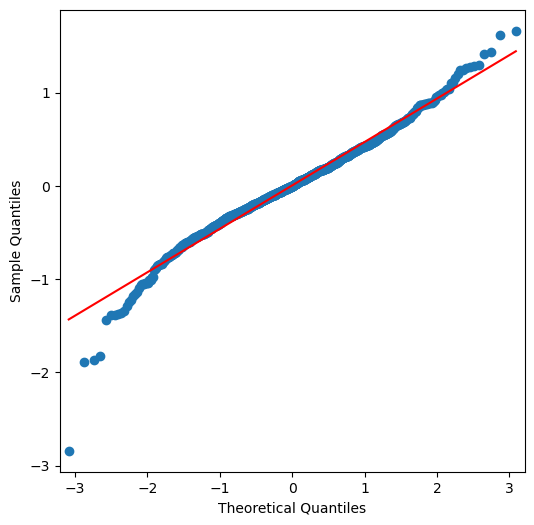

In [24]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
fig, ax = plt.subplots(figsize=(6, 6))

# Remove the first and last point from residuals
residuals = arima_obj_fit.resid[2:]

sm.qqplot(residuals, line='s', ax=ax)
plt.show()

In [25]:
print(djia_df['diffval'], djia_df['ARIMA'])

0      22.082691
1      21.590384
2      21.165384
3      20.875000
4      21.153847
         ...    
988    29.020000
989    28.889999
990    29.420000
991    29.160000
992    29.400000
Name: diffval, Length: 993, dtype: float64 0       0.000000
1      33.124037
2      21.098082
3      20.706733
4      20.472438
         ...    
988    28.686688
989    29.027026
990    28.896886
991    29.427416
992    29.167146
Name: ARIMA, Length: 993, dtype: float64


In [26]:
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
0,2020-01-02,21.511538,22.115383,21.432692,22.082691,21.268667,5453760,0.000000,22.082691
1,2020-01-03,21.730768,21.851923,21.523075,21.590384,20.794510,7860320,33.124037,21.590384
2,2020-01-06,21.423077,21.423077,21.042307,21.165384,20.385176,5387200,21.098082,21.165384
3,2020-01-07,21.165384,21.169230,20.673077,20.875000,20.105499,4614480,20.706733,20.875000
4,2020-01-08,20.978846,21.190384,20.678846,21.153847,20.374060,2984800,20.472438,21.153847


In [27]:
djia_df['diffval'].iloc[2:]

2      21.165384
3      20.875000
4      21.153847
5      21.790384
6      21.115383
         ...    
988    29.020000
989    28.889999
990    29.420000
991    29.160000
992    29.400000
Name: diffval, Length: 991, dtype: float64

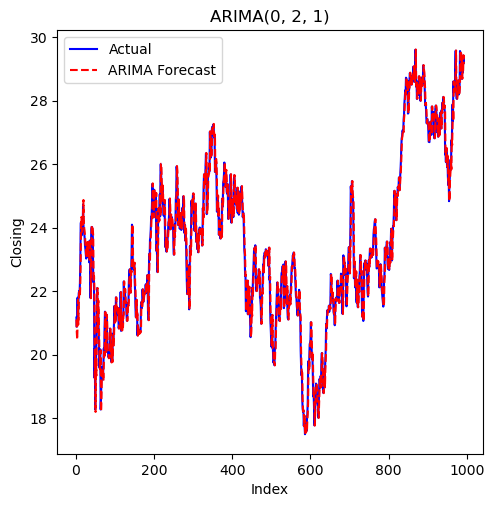

In [28]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
djia_df['diffval'].iloc[2:].plot(color='b', linestyle='-', ax=axarr, label='Actual')
djia_df['ARIMA'].iloc[2:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast')
axarr.set_title('ARIMA(0, 2, 1)')
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend()  # Add legend

plt.show()

## Interpreting the Prediction Interval
The get_forecast() function allows the prediction interval to be specified.

The alpha argument on the conf_int() function on the PredictionResult specifies the prediction level.

An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range.

Put another way, the 95% prediction interval suggests that there is a high likelihood that the real observation will be within the range.

We can ask for a range that is narrower but increases the statistical likelihood of a real observation falling outside of the range.
We can develop a model that has more predictive power and in turn makes more accurate predictions.
Further, the prediction interval is also limited by the assumptions made by the model, such as the distribution of errors made by the model fit a Gaussian distribution with a zero mean value (e.g. white noise).

Extending the example above, we can report our forecast with a few different commonly used prediction intervals of 80%, 90%, 95% and 99%.

The complete example is listed below.

In [29]:
from IPython.display import Image
Image(filename =r'Confidence Interval.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Confidence Interval.png'

Here, Zα is the critical value defined based on alpha. For the alpha value 0.05, the critical value is 1.96. The confidence interval with an alpha value 0.05 for the DJIA dataset modeled using the ARIMA(0,2,1) model can be obtained using the forecast function from the arima_obj_fit object:

In [30]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 29.407 between 28.813 and 30.002
90.0% Confidence Interval: 29.407 between 28.644 and 30.170
95.0% Confidence Interval: 29.407 between 28.498 and 30.317
99.0% Confidence Interval: 29.407 between 28.212 and 30.602


## Reference
- Chapter 4, Practical Time Series Analysis, Avishek Pal, PKS Prakash, 2017 Packt Publishing.
- <p>https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/</p>